# Homework 1: Problems
### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1

Practice your git and github skills by submitting this homework via github:

* Clone the class github repository to your computer, the one at https://github.com/gtrichards/PHYS_T480_F18/  (should already have done this).
* Click the Github Classroom link you received via the mailing list. This will create a private github repository through which you'll be submitting your homeworks. Clone that repository to your computer.
* Copy this notebook from the class github repository to your private homework submission repository. IMPORTANT: rename it to `<filename>-FirstLast.ipynb` once you copy it, where `<filename>` is the existing filename and `FirstLast` are your first and last name. Example: `PHYST480-F18-HW1-GordonRichards.ipynb`.
* Solve problems #2, #3, and #4 by filling in the missing cells in the copied notebook.
* Commit the notebook to your repository, and `git push` it upstream.


## Problem 2
Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Overplot the true distribution.

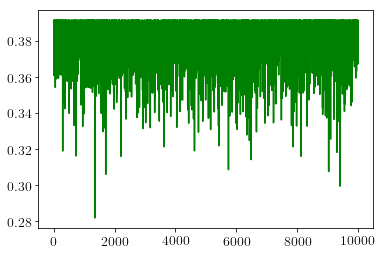

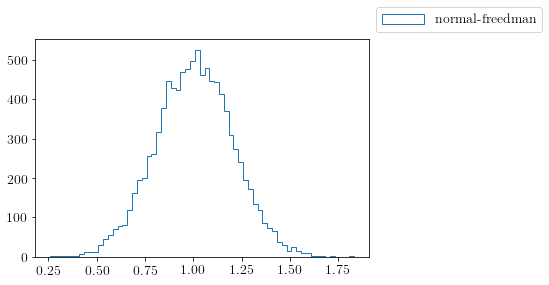

In [1]:
############ problem 2 ################################################################3

import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy import stats
from scipy.stats import cauchy, norm
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML.plotting import hist as fancyhist
setup_text_plots(fontsize=14, usetex=True)
%matplotlib inline

#setting parameters and sample draws for plots
N = 10000
mu = 1.0
sigma = 0.2
sample = norm(mu, sigma).rvs(size=N)

#true plot, or at least, as accurate as possible
from sklearn.neighbors import KernelDensity
def kde_sklearn(data, bandwidth = 1.0, kernel="gaussian"):
    kde_skl = KernelDensity(bandwidth = bandwidth, kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(sample[:, np.newaxis]) # sklearn returns log(density)
    return np.exp(log_pdf)

PDFgaussian = kde_sklearn(sample,bandwidth=1.0,kernel="gaussian")
plt.figure()
plt.plot(PDFgaussian, color='green')

#freedman plot
plt.figure()
fancyhist(sample, bins="freedman", histtype="step", label = "normal-freedman")
plt.legend(bbox_to_anchor=(1,1,1,1), loc=3)
plt.show()

#currently unable to overlay plots - the two graphs have extreme differences in height

 

## Problem 3
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays with `np.concatenate()`) 
another sample of 10,000 data values drawn from a `cauchy` distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Comment.

C:\Users\diaso\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


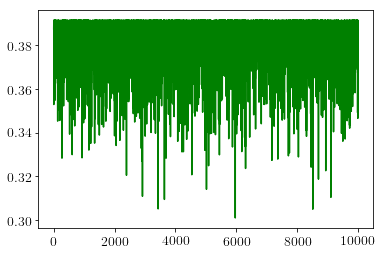

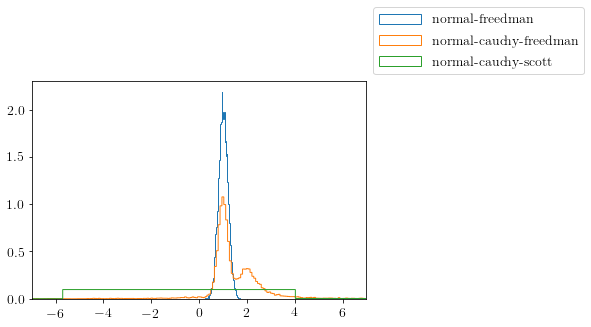

It looks like the three plots should have similar shapes but they have decreasing amplitudes according to their legend order.


In [3]:
############ problem 3 ################################################################3

import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy import stats
from scipy.stats import cauchy, norm
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML.plotting import hist as fancyhist
setup_text_plots(fontsize=14, usetex=True)
%matplotlib inline

#normal distribution sample
N = 10000
mu = 1.0
sigma = 0.2
sample = norm(mu, sigma).rvs(N)

#cauchy distribution sample plus normal sample
np.random.seed(0)
J = N
nu= 2.0 #actually mu
gamma = 0.5
x = stats.cauchy(nu, gamma).rvs(J)

xplot = np.concatenate([sample,x])

#true plot, or at least, as accurate as possible
from sklearn.neighbors import KernelDensity
def kde_sklearn(data, bandwidth = 1.0, kernel="gaussian"):
    kde_skl = KernelDensity(bandwidth = bandwidth, kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(sample[:, np.newaxis]) # sklearn returns log(density)
    return np.exp(log_pdf)

PDFgaussian = kde_sklearn(sample,bandwidth=1.0,kernel="gaussian")
plt.figure()
plt.plot(PDFgaussian, color='green', label="kernel gaussian")

#freedman plot
plt.figure()
fancyhist(sample, bins="freedman", histtype="step", normed=True, label= "normal-freedman")

#normal-cauchy-freedman and scott plots
fancyhist(xplot, bins="freedman", histtype="step", normed=True, label="normal-cauchy-freedman")
fancyhist(xplot, bins="scott", histtype="step", normed=True,label="normal-cauchy-scott")
plt.xlim(-7,7)
plt.legend(bbox_to_anchor=(1,1,1,1), loc=3)
plt.show()

print("It looks like the three plots should have similar shapes but they have decreasing amplitudes according to their legend order.")

## Problem 4
Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 $\mathscr{N}(0,1)$ draws of $\chi^2$ for `N=2` and `N=5`.  Overplot the theoretical pdf (it will help to use `scipy.special.gamma()`).

C:\Users\diaso\Miniconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':
C:\Users\diaso\Miniconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


Text(0, 0.5, 'pdf')

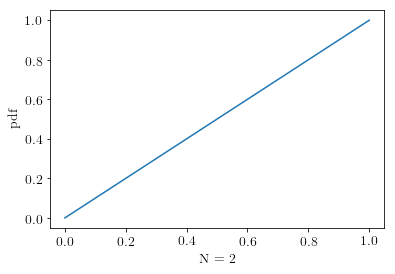

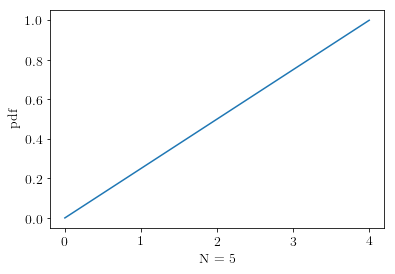

In [16]:
###################################### problem 3 #############################3

#N=2

N=2# Number of draws
mu=0.5 # Location
sigma =1.0/np.sqrt(12)/np.sqrt(N) # Sqrt(N) properly normalizes the pdf

u = np.linspace(0,1,1e6) # Array to sample the space
dist = norm(mu,sigma) # Complete

x = np.linspace(0,1,2) # Two random draws
plt.plot(x)
plt.xlabel('N = 2')
plt.ylabel('pdf')

#N= 5
plt.figure()
N = 5
sigma =1.0/np.sqrt(12)/np.sqrt(N) # Sqrt(N) properly normalizes the pdf

u = np.linspace(0,1,1e6) # Array to sample the space
dist = norm(mu,sigma) # Complete

xn = np.linspace(0,1,5) # five random draws
plt.plot(xn)
plt.xlabel('N = 5')
plt.ylabel('pdf')

### Some useful definitions and functions

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.stats import cauchy, norm
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML.plotting import hist as fancyhist
setup_text_plots(fontsize=14, usetex=True)
%matplotlib inline

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.